# Release frame from 2D images

In [2]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import json
from scipy.signal import argrelextrema
from scipy import ndimage
import ast
import pandas as pd

### Load outputs from testing (Python file) 

In [7]:
out_dir = "../outputs/release_160_frames_2/"
results = np.load(out_dir+"results_release_from_images.npy")
labels = np.load(out_dir+"labels_release_from_images.npy")
each_frame = np.load(out_dir+"each_frame_release_from_images.npy")

# DELETE NANs in labels (Statcast labels are not complete)
inds = np.where(np.isnan(labels))
labels = np.delete(labels, inds)
results = np.delete(results, inds)
each_frame = np.delete(each_frame, inds, axis = 0)

In [8]:
inds = []
for i, liste in enumerate(each_frame):
    a = np.where(liste>0.8)[0]
    if len(a)==0:
        inds.append(i)
print(len(each_frame), len(inds))

561 207


### Change from maximum to first frame with more than 80%:

In the current results-list, the frame with the highest output value is selected. This would not work in real time, because first all frames would have to run and then the highest value can be selected. Thus, the output can be changed: Instead of using the maximum, the first frame where the output value is higher than 95% is selected

In [9]:
#plt.figure(figsize=(20,10))
#for i in each_frame[:30]:
#    plt.plot(i)
#plt.show()

results = []
replaced=0
for liste in each_frame:
    a = np.where(liste>0.8)[0]
    #print(a)
    if len(a)==0:
        a =[np.nan]
        replaced+=1
    results.append(a[0])
    
# DELETE NANs resulting from thresholding
inds = np.where(np.isnan(results))
labels = np.delete(labels, inds)
print("For plotting the results, ", len(inds[0]), " data were deleted because no results were available (corrsponds to )", len(inds[0])*100/float(len(results)), "%")
    
results = np.delete(results, inds)

# print("Percentage of data where no frame has more than 80% probability:", str(round(replaced/float(len(each_frame)), 3)*100)+"%")

For plotting the results,  207  data were deleted because no results were available (corrsponds to ) 36.898395721925134 %
Percentage of data where no frame has more than 80% probability: 36.9%


## Evaluate results

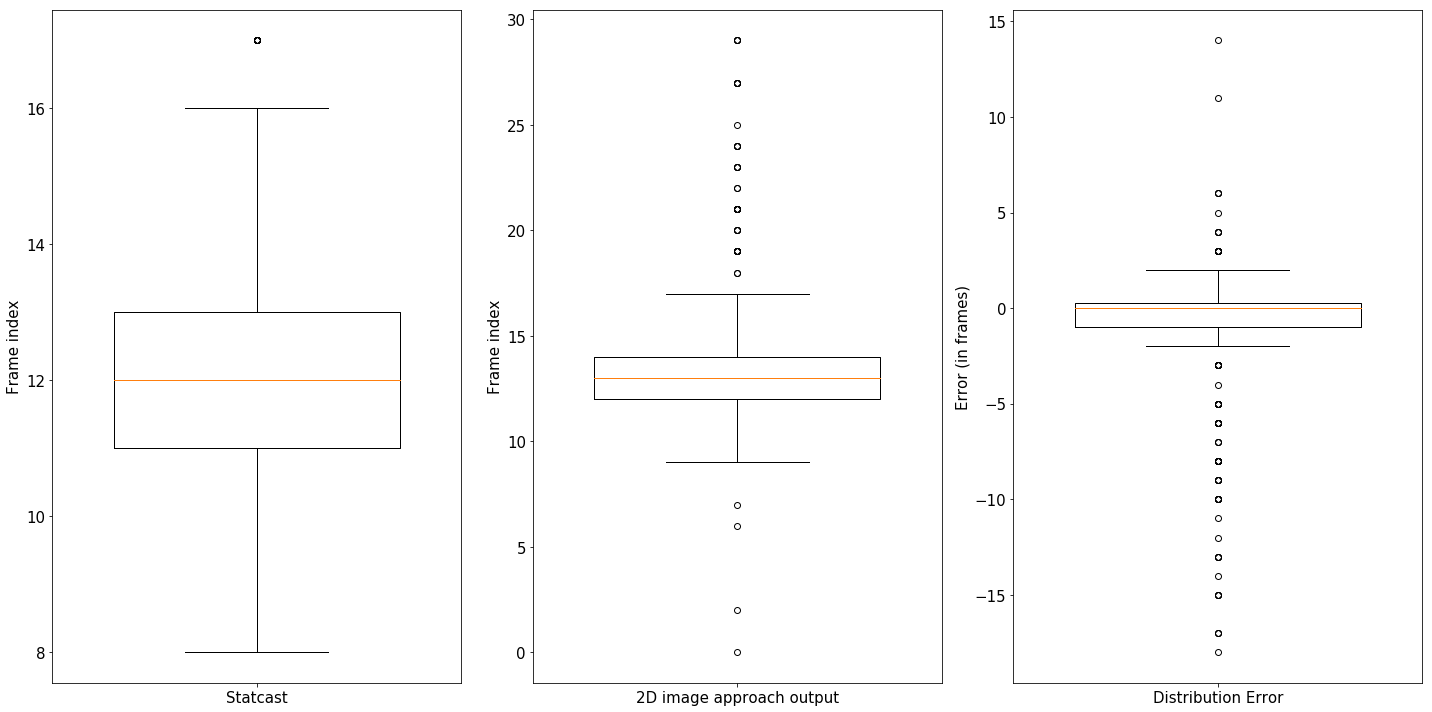

In [6]:
deviation = labels-results
error = np.absolute(deviation)

plt.figure(figsize = (20,10))
plt.subplot(131)
plt.boxplot(labels, positions= [0], widths=(0.7))
plt.xticks([0], ["Statcast"], fontsize=15)
plt.yticks(fontsize=15)
# plt.title("Ground truth labels")
plt.ylabel("Frame index", fontsize=15)
# plt.ylim(60,160)
# plt.show()

plt.subplot(132)
plt.boxplot(results, positions= [0], widths=(0.7))
plt.xticks([0], ["2D image approach output"], fontsize=15)
plt.yticks(fontsize=15)
# plt.title("Error of detected release frame")
plt.ylabel("Frame index", fontsize=15)
# plt.ylim(60,160)
# plt.show()

plt.subplot(133)
plt.boxplot(deviation, positions= [0], widths=(0.7))
plt.xticks([0], ["Distribution Error"], fontsize=15)
plt.yticks(fontsize=15)
# plt.title("Error of detected release frame")
plt.ylabel("Error (in frames)", fontsize=15)
plt.tight_layout()
plt.show()